# ASSIGNMENT 1 

Rashib Jain (rj424)
Shalom Otieno (soo26)

## Part 1: Question 1
### Importing Libraries

In [1]:
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Loading dataset

In [2]:
house_df = pd.read_csv("train.csv")
SalePrice = house_df.SalePrice

## Part 1: Question 2

In [3]:
num_df = house_df.select_dtypes(include = ['float64', 'int64'])
num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000



### Examples of continuous features in dataset:
- OverallQual, YearBuilt, LotArea

In [4]:
cat_df = house_df.select_dtypes(include = 'object')
cat_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### examples of categorial features in dataset:
- GarageType, SaleCondition, Neighborhood
- plotted a histogram of Overall quality as the numerical feature example using matplotlib and neighborhood for the categorical

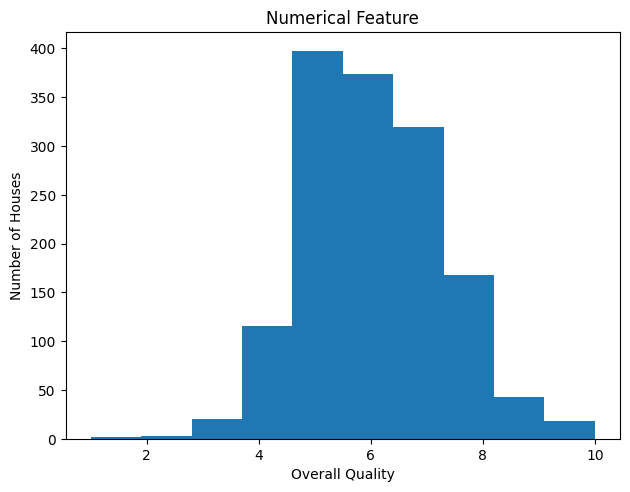

In [5]:
continuous_feature = house_df['OverallQual']
plt.hist(continuous_feature, bins = 10)
plt.xlabel('Overall Quality')
plt.ylabel('Number of Houses')
plt.tight_layout()
plt.title('Numerical Feature')
plt.show()

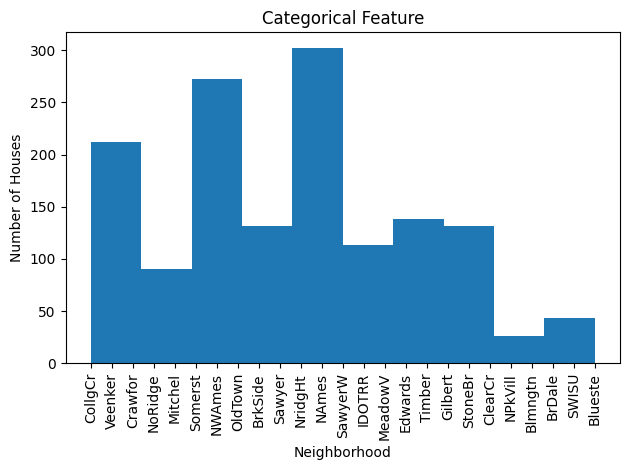

In [6]:
categorical_feature = house_df['Neighborhood']
plt.hist(categorical_feature)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Houses')
plt.title('Categorical Feature')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Part 1: Question 3

### Exploring Data for Missing Values

<AxesSubplot:>

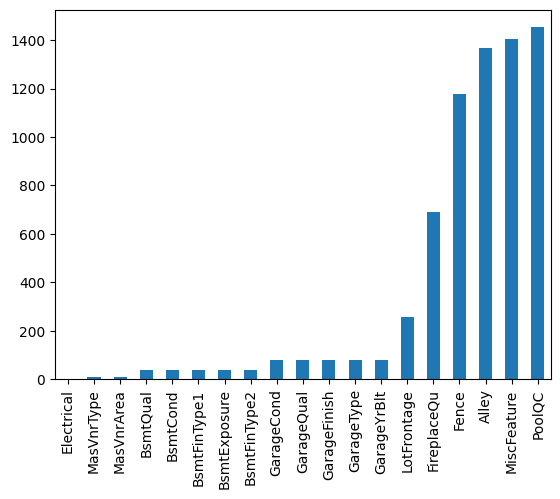

In [7]:
#Check for missing data (comparing variables)

missing_values = house_df.isnull().sum()
missing_values = missing_values[missing_values > 0 ]
missing_values.sort_values(inplace = True)

missing_values.plot.bar()

### Pre-processing steps 

Drop features with the most missing values including:
- LotFrontage 
- Fence
- Alley
- MiscFeature
- PoolQC

Following: we will replace the missing values
- Continuous features: replace N/A with **mean** 
- Categorical features: replace N/A with **mode**

In [8]:
large_nulls = missing_values[missing_values > 100 ]

lst = [i for i in large_nulls.keys()]

house_df.drop(lst, axis = 1, inplace = True)
#previous mentioned features have been dropped


### Check features with missing values again

In [9]:
missing_values = house_df.isnull().sum()
missing_values = missing_values[missing_values > 0 ]
missing_values.sort_values(inplace = True)

lst = [item for item in missing_values.keys()]

### Replacing missing values in dataset with estimated values (mean and mode)

In [10]:
for feature in lst:
    if feature in num_df:
        house_df[feature].fillna(value = house_df[feature].mean(), inplace = True)
        
    elif feature in cat_df:
        print(feature)
        house_df[feature].fillna(value = house_df[feature].mode()[0], inplace = True)
    else:
        pass
        
    

Electrical
MasVnrType
BsmtQual
BsmtCond
BsmtFinType1
BsmtExposure
BsmtFinType2
GarageType
GarageFinish
GarageQual
GarageCond


In [11]:
check_columns = house_df.isnull().sum()
check_columns[check_columns > 0 ]

#check to see if any null values remain 

Series([], dtype: int64)

### Normalizing numerical data
#### https://www.youtube.com/watch?v=RbAaONCS5_s
- Crediting external youtube video for guidance

In [12]:
for feature in house_df.columns:
    if feature in num_df:
        house_df[feature] = (house_df[feature] - house_df[feature].mean()) / house_df[feature].std()
        
house_df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730272,0.073350,RL,-0.207071,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,WD,Normal,0.347154
1,-1.727900,-0.872264,RL,-0.091855,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,WD,Normal,0.007286
2,-1.725528,0.073350,RL,0.073455,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,WD,Normal,0.535970
3,-1.723156,0.309753,RL,-0.096864,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,WD,Abnorml,-0.515105
4,-1.720785,0.073350,RL,0.375020,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,WD,Normal,0.869545


In [13]:
# Define new numerical feature post imputation and normalization

numerical_feature = house_df.select_dtypes(include = np.number)

In [14]:
# Find correlation between numerical features and SalePrice

correlation = numerical_feature.corr()
correlation = correlation['SalePrice'].sort_values(ascending = False)

print(correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


##### Select the most positively correlated features excluding SalesPrice 
- Picked features with correlation greater than .5

In [15]:
for feature in correlation.keys():
    if correlation[feature] < .5 :
        house_df.drop(feature, axis = 1, inplace = True)

In [16]:
#Create a new categorical dataframe
categorical_features = house_df.select_dtypes(include = 'object').columns
print(categorical_features)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [17]:
house_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311618,0.350880,TA,TA,Y,WD,Normal,0.347154
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,0.311618,-0.060710,TA,TA,Y,WD,Normal,0.007286
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,0.311618,0.631510,TA,TA,Y,WD,Normal,0.535970
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,1.649742,0.790533,TA,TA,Y,WD,Abnorml,-0.515105
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,1.649742,1.697903,TA,TA,Y,WD,Normal,0.869545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,RFn,0.311618,-0.060710,TA,TA,Y,WD,Normal,-0.074534
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,Unf,0.311618,0.126376,TA,TA,Y,WD,Normal,0.366036
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,RFn,-1.026506,-1.033560,TA,TA,Y,WD,Normal,1.077242
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,-1.026506,-1.089686,TA,TA,Y,WD,Normal,-0.488356


## Part 1: Question 4
### One-hot encoding 

#### A few examples that would be approporaite for one-hot encoding are:
- GarageFinish
- MSZoning
- LotShape
- GarageType

We will convert GarageType and MSZoning to a one-hot econding


In [18]:
#One hot encoding of Garage Finish

garage_finish_encoded = pd.get_dummies(house_df['GarageFinish'], prefix = 'GarageFinish', dtype = int)
garage_finish_encoded.head()

,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


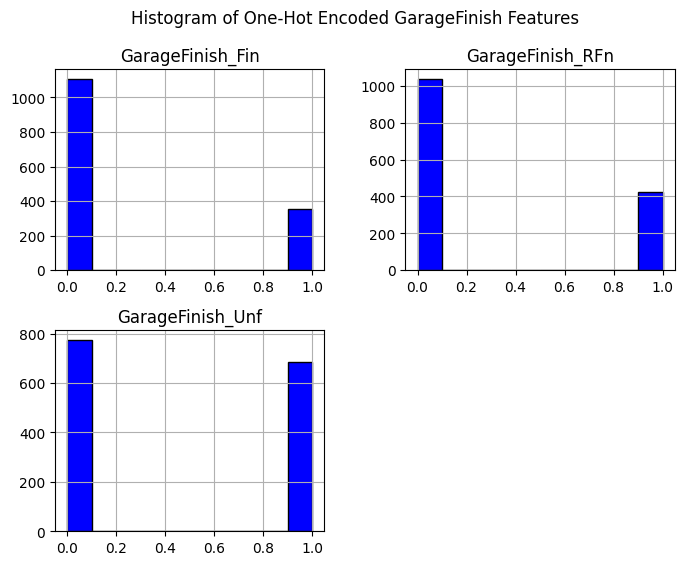

In [19]:
garage_finish_encoded.hist(color = 'blue', edgecolor ='black', figsize = (8,6))
plt.suptitle('Histogram of One-Hot Encoded GarageFinish Features')
plt.show()

In [20]:
#One hot encoding of MSZoning 

mszoning_encoded = pd.get_dummies(house_df['MSZoning'], prefix = 'MSZoning', dtype = int)
mszoning_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [21]:
# Drop particular categorical features which were decided to not be as impactful

cat_features_to_keep = ['MSZoning','Utilities','Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'KitchenQual',
                             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

for feature in categorical_features:
    if feature not in cat_features_to_keep:
        house_df.drop([feature], axis=1, inplace = True)
    else:
        feature_encoded = pd.get_dummies(house_df[feature], prefix = feature, dtype = int)
        house_df = pd.concat([house_df, feature_encoded], axis = 1)
        house_df.drop(feature, axis = 1, inplace = True)

## Part 1: Question 5

- We decided to only use numerical feature that were strongly correlated with the saleprice after we realised the model performed poorly with the above categorical features.
- Performance is still low with an R2 score of: **0.7736928402773303**

In [22]:
#Will only keep the numerical features -> model was poor with categorical features

house_df2 = pd.DataFrame()
for feature in house_df:
    if feature in num_df:
        house_df2 = pd.concat([house_df2, house_df[feature]], axis = 1)
        
house_df2 = house_df2.drop('SalePrice', axis = 1)


In [23]:
#define model

def f(X,theta):
    return X.dot(theta)

In [24]:
# define objective 

def mean_squared_error(theta, X, y):
    return 0.5*np.mean((y-f(X, theta))**2)

In [25]:
# define optimizer - normal equation

def ordinary_least_sqaures(X, y):
    x_transpose = X.T
    return np.linalg.inv(x_transpose.dot(X)).dot(x_transpose).dot(y)

In [26]:
#add an extra column of ones
house_df2.loc[:,"Bias Term"] = 1

In [27]:
# Normalize real SalePrice Values 

SalePrice_normal = (SalePrice - SalePrice.mean()) / SalePrice.std()

In [28]:
#house_df = x-features 
#SalePrice_normal = y-target

theta_best = ordinary_least_sqaures(house_df2, SalePrice_normal)

In [29]:
#generate predictions with theta best

SalePrice_pred = f(house_df2, theta_best)

In [30]:
error = mean_squared_error(theta_best, house_df2, SalePrice_normal)
print(error)

0.113076077409375


### Calculate R-squared

In [31]:
r_squared = 1 - (np.sum((SalePrice_normal - SalePrice_pred) ** 2) / np.sum((SalePrice_normal - np.mean(SalePrice_normal)) ** 2))
print(r_squared)

0.7736928402773303


# Testing Data

In [32]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Preprocess Test Data to similar format to training data

In [33]:
for feature in test_data:
    if feature not in house_df2:
        test_data.drop(feature, axis = 1, inplace = True)

In [34]:
test_data.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [35]:
test_data['TotalBsmtSF'].fillna(np.mean(test_data['TotalBsmtSF']), inplace=True)
test_data['GarageCars'].fillna(np.mean(test_data['GarageCars']), inplace=True)
test_data['GarageArea'].fillna(np.mean(test_data['GarageArea']), inplace=True)


In [36]:
# No missing values
test_data.isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

In [37]:
# Normalize test data

for feature in test_data:
        test_data[feature] = (test_data[feature] - test_data[feature].mean()) / test_data[feature].std()
        
test_data.loc[:,'Bias']=1
test_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Bias
0,-0.750844,-0.340828,-1.072517,-0.370681,-0.654337,-1.215171,-1.028367,-0.918020,-0.987674,1.185538,1
1,-0.054858,-0.439544,-1.214492,0.638925,0.433150,-0.323429,-1.028367,-0.255283,-0.987674,-0.740959,1
2,-0.750844,0.843770,0.678509,-0.266785,-0.573968,0.294407,0.772818,-0.255283,0.301519,0.042545,1
3,-0.054858,0.876675,0.678509,-0.271302,-0.578991,0.242921,0.772818,0.407454,0.301519,-0.012761,1
4,1.337113,0.679242,0.394559,0.528252,0.310085,-0.424342,0.772818,-0.918020,0.301519,0.153157,1


In [38]:
test_pred = f(test_data, theta_best)